In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sample_no_signalling(num: int=1)->np.array:
    A, B, C = np.random.uniform(size=(3,2,2))
    A = A/np.sum(A)
    B[0,:] = np.sum(A[0,:])*B[0,:]/np.sum(B[0,:])
    B[1,:] = np.sum(A[1,:])*B[1,:]/np.sum(B[1,:])
    C[:,0] = np.sum(B[:,0])*C[:,0]/np.sum(C[:,0])
    C[:,1] = np.sum(B[:,1])*C[:,1]/np.sum(C[:,1])
    min_sum = np.min(np.minimum(np.sum(A, axis=1), np.sum(C, axis=0)))
    d1 = np.random.uniform(0, min_sum)
    d2 = np.sum(C, axis=0)[0] - d1
    d3 = np.sum(A, axis=1)[1] - d2
    d4 = np.sum(A, axis=1)[0] - d1
    D = np.array([[d1, d2], [d3, d4]])
    result = np.concatenate((np.concatenate((A, B), axis=1), np.concatenate((D, C),axis=1)), axis=0)
    return result

In [2]:
def check_correctness(box: np.array)->bool:
    row_check = np.sum(box[:,:2], axis=1) == np.sum(box[:,2:], axis=1)
    col_check = np.sum(box[:2,:], axis=0) == np.sum(box[2:,:], axis=0)
    print(row_check, col_check)
    return np.all(row_check, col_check)

In [47]:
def generate_img(box: np.array, resolution = 100)->np.array:
    img = []
    for row in box:
        img_row = []
        for element in row:
            img_tmp = np.ones(shape=(resolution, resolution))
            img_tmp[:, :int(resolution*element)] = 0
            img_row.append(img_tmp)
        img.append(np.hstack(img_row))
    img = np.vstack(img)
    return img

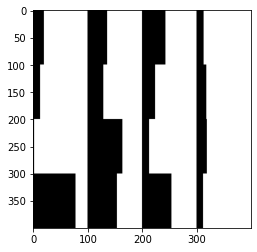

In [58]:
plt.imshow(generate_img(sample_no_signalling()), cmap='gray')

In [59]:
def check_locality(box: np.array)->bool:
    p00_00, p11_00, p01_00, p10_00 = box[0,:]
    p00_10, p11_10, p01_10, p10_10 = box[1,:]
    p00_01, p11_01, p01_01, p10_01 = box[2,:]
    p00_11, p11_11, p01_11, p10_11 = box[3,:]
    
    c1 = p01_00 + p10_00 + p00_10 + p11_10 + p00_01 + p11_01 + p01_11 + p10_11
    c2 = p00_00 + p11_00 + p01_10 + p10_10 + p00_01 + p11_01 + p00_11 + p11_11
    c3 = p00_00 + p11_00 + p00_10 + p11_10 + p01_01 + p10_01 + p00_11 + p11_11
    c4 = p00_00 + p11_00 + p00_10 + p11_10 + p00_01 + p11_01 + p01_11 + p10_11
    
    c5 = p11_00 + p00_00 + p01_10 + p10_10 + p01_01 + p10_01 + p01_11 + p10_11
    c6 = p01_00 + p10_00 + p11_10 + p00_10 + p01_01 + p10_01 + p01_11 + p10_11
    c7 = p01_00 + p10_00 + p01_10 + p10_10 + p11_01 + p00_01 + p01_11 + p10_11
    c8 = p01_00 + p10_00 + p01_10 + p10_10 + p01_01 + p10_01 + p11_11 + p00_11
    
    return np.all([inq < 3 for inq in [c1, c2, c3, c4, c5, c6, c7, c8]])

In [102]:
r = []
for i in range(1000000):
    r.append(check_locality(sample_no_signalling()))

In [103]:
np.all(r)

True